<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 02 - IA**

## **Outline**

1. [Ejercicio 1. Clasificación](#eje1)
2. [Ejercicio 2. Regresión](#eje2)
3. [Ejercicio 3. LeaveOneOut](#eje3)
4. [Ejercicio 4. DNN](#eje4)

In [3]:
#@title **1. Student:** MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
quiz = "quiz02" #@param {type:"string"}
import os
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/'+quiz
os.chdir(path)
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/quiz02


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

#### - Para este notebook es recomendable usar la **GPU**. Por favor verifique que esté habilitada la GPU en `Editar -> Configuración del notebook -> Acelerador de hardware (Opción GPU)`
---

## **Parkinson dataset**

Vamos a explorar un dataset que contiene los datos de 195 grabaciones de voz de un cierto número de pacientes, de los cuales debe clasificar cuáles padecen la enfermedad de Parkinson y cuáles son pacientes control (pacientes sin la enfermedad). Este dataset cuenta con 23 columnas asociadas a diferentes medidas biomédicas de la voz de los pacientes.

En la columna `status` se proporcionan las etiquetas para cada paciente: '0' si es un paciente control y '1' si es un paciente con enfermedad de Parkinson.

[Fuente](https://archive.ics.uci.edu/ml/datasets/Parkinsons)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
46,phon_R01_S10_5,245.510,262.090,231.848,0.00235,0.00001,0.00127,0.00148,0.00380,0.01608,0.141,0.00906,0.00977,0.01149,0.02719,0.00476,24.602,0,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336
58,phon_R01_S16_5,116.879,131.897,108.153,0.00788,0.00007,0.00334,0.00493,0.01003,0.02645,0.265,0.01394,0.01625,0.02137,0.04183,0.00786,22.603,1,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
74,phon_R01_S19_3,110.793,128.101,107.316,0.00494,0.00004,0.00260,0.00283,0.00780,0.02442,0.216,0.01432,0.01325,0.01831,0.04295,0.00479,25.438,1,0.437031,0.815908,-5.313360,0.201861,2.225815,0.244512
83,phon_R01_S20_6,98.804,102.305,87.804,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.244,1,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275


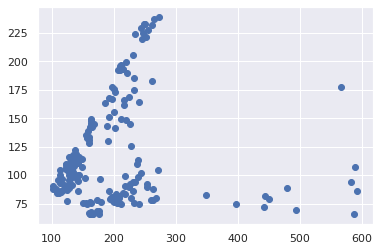

In [ ]:
#@title **Parkinson dataset**
cols = ["name", "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "status", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE"]
variable_x = "MDVP:Fhi(Hz)" #@param {type:"string"}
variable_y = "MDVP:Flo(Hz)" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
sns.set_theme()

X = pd.read_csv("data/parkinsons.data", header=0)
X = shuffle(X)
plt.scatter(X[variable_x], X[variable_y])
X.head()

# **Ejercicio 1. Clasificación**  <a name="eje1"></a>

Implemente la clasificación de pacientes sobre el dataset de Parkinson.<br>
Recuerde que `status=0` corresponde a pacientes control y `status=1` corresponde a pacientes que padecen la enfermedad de Parkinson.

Resuelva las siguientes tareas:
1. Obtenga las "mejores caracteristicas" usando un estimador **`DecisionTreeClassifier`**
2. Con las mejores caracteristicas, entrenamos un nuevo estimador **`RandomForestClassifier`**

Para esto, se debe crear una función que: 

- Reciba `x_train`,`x_test`,`y_train`, `y_test` y el número de mejores características `n` que se van a utilizar.

- Entrene un clasificador `DecisionTreeClassifier` como estimador con parámetros `max_depth=10` y `criterion="gini"`. Con esta configuración estime las mejores características mediante el uso de `feature_importances_`

- Retorne el puntaje de la clasificación obtenida en **test** como`score1`.

- Utilice las mejores `n` características para entrenar un estimador `RandomForestClassifier` con parámetros `n_estimators=20` y `criterion="entropy"`.

- Tenga presente que las `n` mejores características corresponden a valores ordenados de forma **DESCENDENTE**. Usted puede llegar a este ordenamiento de manera manual o aplicando alguna modificación al resultado de la función **`np.argsort`**

- Retorne el puntaje de la clasificación obtenida en **test** como`score2`.

<b>Referencia de np.argsort:</b> https://numpy.org/doc/stable/reference/generated/numpy.argsort.html<br>
<b>Referencia Decision Tree Classifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
<b>Referencia Random Forest Classifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



In [4]:
#@title **Escriba su código aquí! - student**
#@markdown No modifique las dos últimas lineas
def fun_21020521(X_train, X_test, y_train, y_test, n):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    np.random.seed(23)
#Reciba x_train,x_test,y_train, y_test y el número de mejores características n que se van a utilizar.
#Entrene un clasificador DecisionTreeClassifier como estimador con parámetros max_depth=10 y criterion="gini".
    est1 = DecisionTreeClassifier(max_depth=10, criterion="gini")
#Con esta configuración estime las mejores características mediante el uso de feature_importances_
#Retorne el puntaje de la clasificación obtenida en test como score1.
    est1.fit(X_train, y_train)
    features = est1.feature_importances_
    score1 = est1.score(X_test, y_test)
    bestcols = np.argsort(features)[::-1][:n]
#Utilice las mejores n características para entrenar un estimador RandomForestClassifier con parámetros n_estimators=20 y criterion="entropy".
#Tenga presente que las n mejores características corresponden a valores ordenados de forma DESCENDENTE. 
#Usted puede llegar a este ordenamiento de manera manual o aplicando alguna modificación al resultado de la función np.argsort
#Retorne el puntaje de la clasificación obtenida en test comoscore2.
    X_train_best = X_train.iloc[:, features]
    X_test_best = X_test.iloc[:, features]
    est2 = RandomForestClassifier(n_estimators=20, criterion="entropy")
    est2.fit(X_train_best, y_train)
    score2 = est2.score(X_test_best, y_test)

    return score1, score2

import urllib.parse, inspect
src21020521 = urllib.parse.quote_plus(inspect.getsource(fun_21020521))

In [5]:
#@title **verifique su respuesta**
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
np.random.seed(23)

X = pd.read_csv("data/parkinsons.data", header=0)
y = X["status"]
X = X.drop("status", axis=1)
X = X.drop("name", axis=1)
X,y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
numbestfeat = 11

score1, score2 = fun_21020521(X_train, X_test, y_train, y_test, numbestfeat)


In [6]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_21020521 $src21020521

evaluation result CORRECT


<div><br><br><br><br><br></div>

## **Linnerrud dataset**

Vamos a explorar un dataset que contiene los datos de 20 hombres de mediana edad inscritos en un programa de ejercicio cardiovascular, respecto a variables fisiológicas como `weight` (peso), `waist` (cintura) y `pulse` (pulso). Adicionalmente, este dataset cuenta con tres variables asociadas con ejercicios cardiovasculares, tales como `chins`, `situps` (abdominales) and `jumps` (saltos).

[Fuente](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset)

# **Ejercicio 2. Regresión**  <a name="eje2"></a>

Vamos a hacer una función que explore los regresores **`DecisionTreeRegressor`, `RandomForestClassifier`** y **`SVR`** para el dataset Linnerrud, realizando lo siguiente: 

- Utilizar **solamente** las características: `weight`, `waist`, `pulse`

- La característica `situps` (abdominales) será el objetivo de la primera regresión

- El 60% del dataset se utilizará como train `X_train`, `y_train`

- El 40% del dataset restante se utilizará como test: `X_test`, `y_test`

- Realice una exploración para los regresores: **`DecisionTreeRegressor(random_state=1)`, `RandomForestClassifier(random_state=1)`** y **`SVR`**

- Devuelva **una lista** `scores` con el valor del **mean absolute error (MAE)** para cada uno de los tres regresores.

- Posteriormente, utilice **solamente** la característica: `weight`.<br>De nuevo, realice una exploración para el regresor: **`RandomForestClassifier`** con el parámetro `n_estimators` = $\{5, 10, 20\}$  y `random_state=1`

- Devuelva **una lista** `scores2` con el valor del **mean squared error (MSE)** para cada uno de los tres valores del regresor.

- Devuelva **una lista** `predictions` con las **predicciones** para cada uno de los regresores.

- Devuelva los datos de test `X_test` y las etiquetas `y_test`


<b>Referencia Decision Tree Regressor:</b> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
<b>Referencia Random Forest Regressor:</b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
<b>Referencia Support Vector Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [55]:
#@title **Escriba su código aquí! - student**
#@ markdown No modifique las dos últimas lineas

def fun_22020521(data):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVR
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import pandas as pd
    np.random.seed(23)


# #Utilizar solamente las características: weight, waist, pulse
# #La característica situps (abdominales) será el objetivo de la primera regresión
# #El 60% del dataset se utilizará como train X_train, y_train
# #El 40% del dataset restante se utilizará como test: X_test, y_test

    X =  data[['weight', 'waist', 'pulse',]].values
    y = data['situps'].values
    n = int(len(data)*0.6)
    X_train, y_train, X_test, y_test = X[:n], y[:n], X[n:], y[n:] 

#Realice una exploración para los regresores: DecisionTreeRegressor(random_state=1),
#RandomForestClassifier(random_state=1) y SVR
    est_DC = DecisionTreeRegressor(random_state=1) 
    est_RF = RandomForestClassifier(random_state=1) 
    est_SVR = SVR()
    regressors = [est_DC, est_RF, est_SVR]
#Devuelva una lista scores con el valor del mean absolute error (MAE) para cada uno de los tres regresores.
    scores = []
    scores2 = []
    predictions = []

    for i in regressors:
        i.fit(X_train, y_train.ravel())
        p = i.predict(X_test)
        scores.append(mean_squared_error(y_test, p))
        predictions.append(p)
#Posteriormente, utilice solamente la característica: weight.    
    X = data['weight'].values
    n = int(len(data)*0.6)
    X_train, y_train, X_test, y_test = X[:n], y[:n], X[n:], y[n:] 

#De nuevo, realice una exploración para el regresor: RandomForestClassifier con el parámetro n_estimators = {5,10,20} y random_state=1
    regressors = RandomForestClassifier(n_estimators =  {5,10,20},  random_state=1)

#evuelva una lista scores2 con el valor del mean squared error (MSE) para cada uno de los tres valores del regresor.
#Devuelva una lista predictions con las predicciones para cada uno de los regresores.
#Devuelva los datos de test X_test y las etiquetas y_test
    return scores, scores2, predictions, X_test, y_test

import urllib.parse, inspect
src22020521 = urllib.parse.quote_plus(inspect.getsource(fun_22020521))

IndexError: ignored

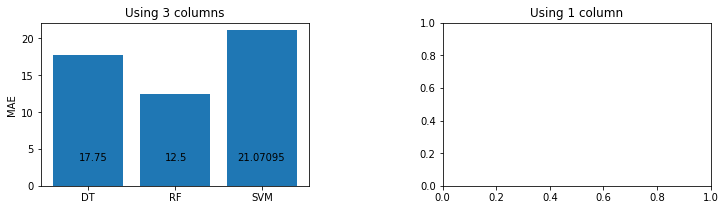

In [56]:
#@title **verifique su respuesta**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.utils import shuffle
np.random.seed(23)

X,y = load_linnerud(return_X_y=True)
X = np.concatenate((X,y), axis=1)
X = pd.DataFrame(X, columns=["weight", "waist", "pulse", "chins", "situps", "jumps"])
vals = shuffle(X)
scores, scores2, predictions, x, y = fun_22020521(vals)

y_ord = []

x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.set_title('Using 3 columns')
ax1.bar(range(0,len(scores)), scores)
ax1.set_xticks(range(0,len(scores)))
ax1.set_xticklabels(('DT', 'RF', 'SVM'))
ax1.set_ylabel('MAE')
ax1.text(-0.1, 3.4, str(scores[0])[:8])
ax1.text(0.88, 3.4, str(scores[1])[:8])
ax1.text(1.72, 3.4, str(scores[2])[:8])

ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='RF MSE '+str(scores2[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='RF MSE '+str(scores2[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='RF MSE '+str(scores2[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('weight')
ax2.set_ylabel('jumps')
ax2.legend()

In [54]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_22020521 $src22020521

Traceback (most recent call last):
  File "<stdin>", line 26, in check_solution
  File "<string>", line 1, in <module>
  File "<string>", line 57, in grade
  File "<string>", line 50, in fun_22020521
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 169, in __iter__
    return iter(self.estimators_)
AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<stdin>", line 38, in <module>
  File "<stdin>", line 28, in check_solution
NameError: name 'traceback' is not defined
call error


<div><br><br><br><br><br></div>

# **Ejercicio 3. LeaveOneOut**  <a name="eje3"></a>

El dataset IRIS presenta relativamente pocos ejemplos (150), por lo que una partición grande para el test puede incurrir en un aprendizaje debil (pocos datos de entrenamiento). Vamos a implementar una función que realice un esquema de validación **leave-one-out**, por lo tanto desarrolle una función que: 

- Utilice la clase `LeaveOneOut` de sklearn y devuelva el número de splits `ns`

- Como clasificadores utilice:
 - `DecisionTreeClassifier` con el parámetros `max_depth=100` y `random_state=1`
 - `RandomForestClassifier` con el parámetros `n_estimators=2` y `random_state=1`
 - `SVC` con el parámetro `kernel='linear'`

- Obtenga el puntaje **promedio** para cada clasificador y devuélvalo (deben ser 3 valores)

- Obtenga la **desviación estándar** para cada clasificador y devuélvala (deben ser 3 valores)

<b>Referencia Leave One Out:</b> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

---
## **Init professor**

In [41]:
#@title **Escriba su código aquí! - student**
#@ markdown No modifique las dos últimas lineas

def fun_23020521(data, y):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    np.random.seed(23)

#Utilice la clase LeaveOneOut de sklearn y devuelva el número de splits ns
    loo = LeaveOneOut()
    ns = loo.get_n_splits(data)
#DecisionTreeClassifier con el parámetros max_depth=100 y random_state=1
#RandomForestClassifier con el parámetros n_estimators=2 y random_state=1
#SVC con el parámetro kernel='linear
    est1 = DecisionTreeClassifier(max_depth=100,random_state=1)
    est2 = RandomForestClassifier(n_estimators=2,random_state=1)
    est3 = SVC(kernel='linear')

    score1 = []
    score2 = []
    score3 = []
#Obtenga el puntaje promedio para cada clasificador y devuélvalo (deben ser 3 valores)
#Obtenga la desviación estándar para cada clasificador y devuélvala (deben ser 3 valores)
    for train_index, test_index in loo.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = y[train_index], y[test_index]
#Usamos fit para los tres estimadores para X,y (train)
        est1.fit(X_train,y_train)
        est2.fit(X_train,y_train)
        est3.fit(X_train,y_train)
#Sacamos los score de cada uno de los estimadores para el X_test
        score1.append(accuracy_score(y_test,est1.predict(X_test)))
        score2.append(accuracy_score(y_test,est2.predict(X_test)))
        score3.append(accuracy_score(y_test,est3.predict(X_test)))

 
    return ns, np.mean(score1), np.mean(score2), np.mean(score3), np.std(score1), np.std(score2), np.std(score3)

import urllib.parse, inspect
src23020521 = urllib.parse.quote_plus(inspect.getsource(fun_23020521))

(-0.54, 2.5400000000000005, 0.6, 1.2)

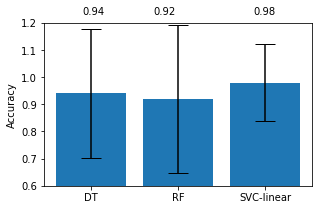

In [42]:
#@title **verifique su respuesta**
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

X,y = load_iris(return_X_y=True)
X, y = shuffle(X, y)

ns, score1, score2, score3, std1, std2, std3 = fun_23020521(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], yerr=[std1,std2,std3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('DT', 'RF', 'SVC-linear'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.1, 1.23, str(score1)[:8])
ax1.text(0.72, 1.23, str(score2)[:8])
ax1.text(1.86, 1.23, str(score3)[:8])
ax1.axis(ymin=0.6, ymax=1.2)

In [43]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_23020521 $src23020521

0.94 0.94
0.9333333333333333 0.9333333333333333
0.98 0.98
0.23748684174075835 0.23748684174075835
0.24944382578492943 0.24944382578492943
0.13999999999999999 0.13999999999999999
evaluation result CORRECT


<div><br><br><br><br><br></div>

# **Ejercicio 4. DNN**  <a name="eje4"></a>


El dataset CIFAR10 contiene 60000 imágenes a color con dimensiones de `32 x 32` pixeles, las cuales pertenecen a 10 posibles clases. Usualmente se entrena este dataset con 50000 imágenes, dejando las 10000 restantes para la etapa de test. En este punto vamos a cargar el dataset CIFAR10 que esta dispuesto en la libreria de tf.keras (`tf.keras.datasets.cifar10.load_data()`).

Escriba una función que: 

- Utilice las particiones de entrenamiento y test propuestas por el dataset original. 

- Haga una red DNN, que reciba como entrada las muestras del dataset y tenga como salida el número relacionado con las clases del dataset. 

- Tanto para la partición de entrenamiento como para la de test, utilice el método `tf.image.rgb_to_grayscale` para convertir las imágenes del dataset a escala de grises. Posteriormente, convierta este resultado al tipo de dato `np.array`

- Además se deben crear tres capas intermedias con 512 neuronas, una con 128 neuronas, y todas con activaciones `relu`

- Entrene el modelo con la configuración: epochs=4, batch_size=128

- La función debe devolver el modelo `DNN`, el resultado `score_DNN` y las dimensiones del dataset en test. 

<b>Referencia `tf.image.rgb_to_grayscale`:</b> https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale

<b>CIFAR10 en Keras:</b> https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

<b>Más información sobre CIFAR10:</b> https://www.cs.toronto.edu/~kriz/cifar.html



In [32]:
#@title **Escriba su código aquí! - student**
#@ markdown No modifique las dos últimas lineas

def fun_24020521():
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  tf.random.set_seed(23)
  np.random.seed(23)

#Utilice las particiones de entrenamiento y test propuestas por el dataset original.
#Haga una red DNN, que reciba como entrada las muestras del dataset y tenga como salida el número relacionado con las clases del dataset.
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Tanto para la partición de entrenamiento como para la de test, utilice el método tf.image.rgb_to_grayscale para convertir las imágenes del dataset a escala de grises. Posteriormente, convierta este resultado al tipo de dato np.array

  x_train_rgb2gray = tf.image.rgb_to_grayscale(x_train)
  x_test_rgb2gray = tf.image.rgb_to_grayscale(x_test)
  x_train = np.array(x_train_rgb2gray)
  x_test = np.array(x_test_rgb2gray)

  x_train = x_train.reshape([-1,32,32,1])
  x_test = x_test.reshape([-1,32,32,1])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  x_train /= 255
  x_test /= 255

#Además se deben crear tres capas intermedias con 512 neuronas, una con 128 neuronas, y todas con activaciones relu
  model = tf.keras.Sequential([tf.keras.layers.Flatten( input_shape=[32, 32, 1]),
                                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

  model.compile(optimizer=tf.keras.optimizers.SGD(), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
#Entrene el modelo con la configuración: epochs=4, batch_size=128
  model.fit(x_train, y_train, epochs=4, batch_size=128, verbose=0)

  test_loss, score_DNN = model.evaluate(x_test, y_test)
#La función debe devolver el modelo DNN, el resultado score_DNN y las dimensiones del dataset en test.

  return model, score_DNN, x_test.shape

import urllib.parse, inspect
src24020521 = urllib.parse.quote_plus(inspect.getsource(fun_24020521))

In [44]:
#@title **verifique su respuesta**
model, score_DNN,  shape_test = fun_24020521()
print("El accuracy obtenido es: ", score_DNN)
print("Las dimensiones en test son: ", shape_test)
print("¡FELICITACIONES!, durante el parcial logró clasificar correctamente: ", score_DNN*shape_test[0], "imágenes")


313/313 [==============================] - 1s 3ms/step - loss: 1.9338 - accuracy: 0.3168
El accuracy obtenido es:  0.31679999828338623
Las dimensiones en test son:  (10000, 32, 32, 1)
¡FELICITACIONES!, durante el parcial logró clasificar correctamente:  3167.9999828338623 imágenes


In [45]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_24020521 $src24020521

2021-09-25 20:37:41.214381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-25 20:37:41.222217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-25 20:37:41.222926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-25 20:37:41.224059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-25 20:37:41.224743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

<div><br><br><br><br><br></div>

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [57]:
#@title **1. Complete la siguiente información:**
taller_name = "quiz02" #@param {type:"string"}
codigo_name = "q02_2173051" #@param {type:"string"}

import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

quiz02 q02_2173051


In [58]:
#@title **2. Guarde los cambios**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [59]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: q02_2173051 dos quiz02
¡PERFECTO!, el archivo   'q02_2173051.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>